In [1]:
import anndata
import numpy as np
import sys
import torch
sys.path.append('../../../')
import velovae as vv
%load_ext autoreload
%autoreload 2

In [2]:
dataset = 'Braindev'
root = "/scratch/blaauw_root/blaauw1/gyichen"
adata = anndata.read_h5ad(f'{root}/data/Braindev_pp.h5ad')
#adata = anndata.read_h5ad(f'{root}/data/velovae/continuous/Braindev/Braindev.h5ad')
adata.obs['clusters'] = adata.obs['Class'].to_numpy()

In [3]:
#Uncomment this if data is not preprocessed
#vv.preprocess(adata, n_gene=2000, min_shared_counts=20, compute_umap=True)
#adata.write_h5ad(f'{dataset}_pp.h5ad')

In [4]:
model_path_base = f'{root}/checkpoints/{dataset}'
figure_path_base = f'{root}/figures/{dataset}'
data_path = f'{root}/data/velovae/continuous/{dataset}'
gene_plot = ['Aldh1l1', 'Mapt', 'Myt1l', 'Lum']

# Informative Time Prior

In [5]:
capture_time = adata.obs['Age'].to_numpy()
tprior = np.array([float(x[1:]) for x in capture_time])
adata.obs['tprior'] = tprior

# VeloVAE

In [6]:
figure_path = f'{figure_path_base}/VeloVAE'
model_path = f'{model_path_base}/VeloVAE'

torch.manual_seed(2022)
np.random.seed(2022)
vae = vv.VAE(adata, 
             tmax=20, 
             dim_z=5, 
             device='cuda:0',
             init_method='tprior',
             init_key='tprior',
             tprior='tprior',
             init_ton_zero=False)

vae.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

vae.save_model(model_path, 'encoder', 'decoder')
vae.save_anndata(adata, 'velovae', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/2000 [00:00<?, ?it/s]

Detected 1218 velocity genes.
Estimating the variance...


  0%|          | 0/2000 [00:00<?, ?it/s]

Initialization using prior time.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/2000 [00:00<?, ?it/s]

Initial induction: 1733, repression: 267/2000
Using informative time prior.
Learning Rate based on Data Sparsity: 0.0004
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 164, test iteration: 326
*********       Stage 1: Early Stop Triggered at epoch 334.       *********
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             *********


  0%|          | 0/29948 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.030
Average Set Size: 602
*********     Round 1: Early Stop Triggered at epoch 521.    *********
Change in noise variance: 0.6550
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 766.    *********
Change in noise variance: 0.0008
Change in x0: 0.1777
*********             Velocity Refinement Round 3             *********
Change in noise variance: 0.0000
Change in x0: 0.1286
*********             Velocity Refinement Round 4             *********
Change in noise variance: 0.0000
Change in x0: 0.0962
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 1828.    *********
Change in noise variance: 0.0000
Change in x0: 0.0980
*********             Velocity Refinement Round 6             *********
Stage 2: Early Stop Triggered at round 5.
*********              Finished. Total Time =   1 h : 11 m : 41 s             *

# Full VB

In [7]:
figure_path = f'{figure_path_base}/FullVB'
model_path = f'{model_path_base}/FullVB'

torch.manual_seed(2022)
np.random.seed(2022)
full_vb = vv.VAE(adata, 
                 tmax=20, 
                 dim_z=5, 
                 device='cuda:0',
                 full_vb=True,
                 init_method='tprior',
                 init_key='tprior',
                 tprior='tprior',
                 init_ton_zero=False)

full_vb.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)
full_vb.save_model(model_path, 'encoder', 'decoder')
full_vb.save_anndata(adata, 'fullvb', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/2000 [00:00<?, ?it/s]

Detected 1218 velocity genes.
Estimating the variance...


  0%|          | 0/2000 [00:00<?, ?it/s]

Initialization using prior time.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/2000 [00:00<?, ?it/s]

Initial induction: 1733, repression: 267/2000
Using informative time prior.
Learning Rate based on Data Sparsity: 0.0004
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 164, test iteration: 326
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             *********


  0%|          | 0/29948 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.030
Average Set Size: 602
Change in noise variance: 0.6385
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 1861.    *********
Change in noise variance: 0.0013
Change in x0: 0.2031
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 1987.    *********
Change in noise variance: 0.0003
Change in x0: 0.1087
*********             Velocity Refinement Round 4             *********
Change in noise variance: 0.0000
Change in x0: 0.0974
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 2592.    *********
Change in noise variance: 0.0000
Change in x0: 0.0800
*********             Velocity Refinement Round 6             *********
Change in noise variance: 0.0000
Change in x0: 0.0800
*********             Velocity Refinement Round 7             ***

# Plotting

In [2]:
# Uncomment this if you have already pre-computed results
root = '/scratch/blaauw_root/blaauw1/gyichen'
dataset = 'Braindev'
adata = anndata.read_h5ad(f'{root}/data/velovae/continuous/{dataset}/{dataset}_post.h5ad')

In [3]:
Ek = np.median(adata.layers['fullvb_velocity_u']**2 + adata.layers['fullvb_velocity']**2, 0)
gidx = np.argsort(Ek)[-4:]

---   Plotting  Results   ---


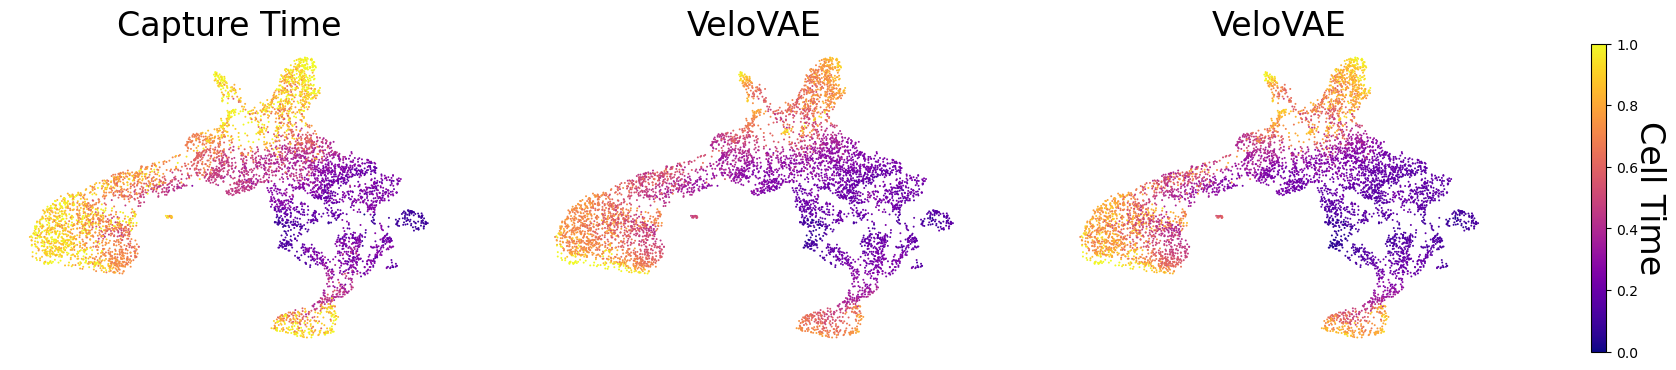

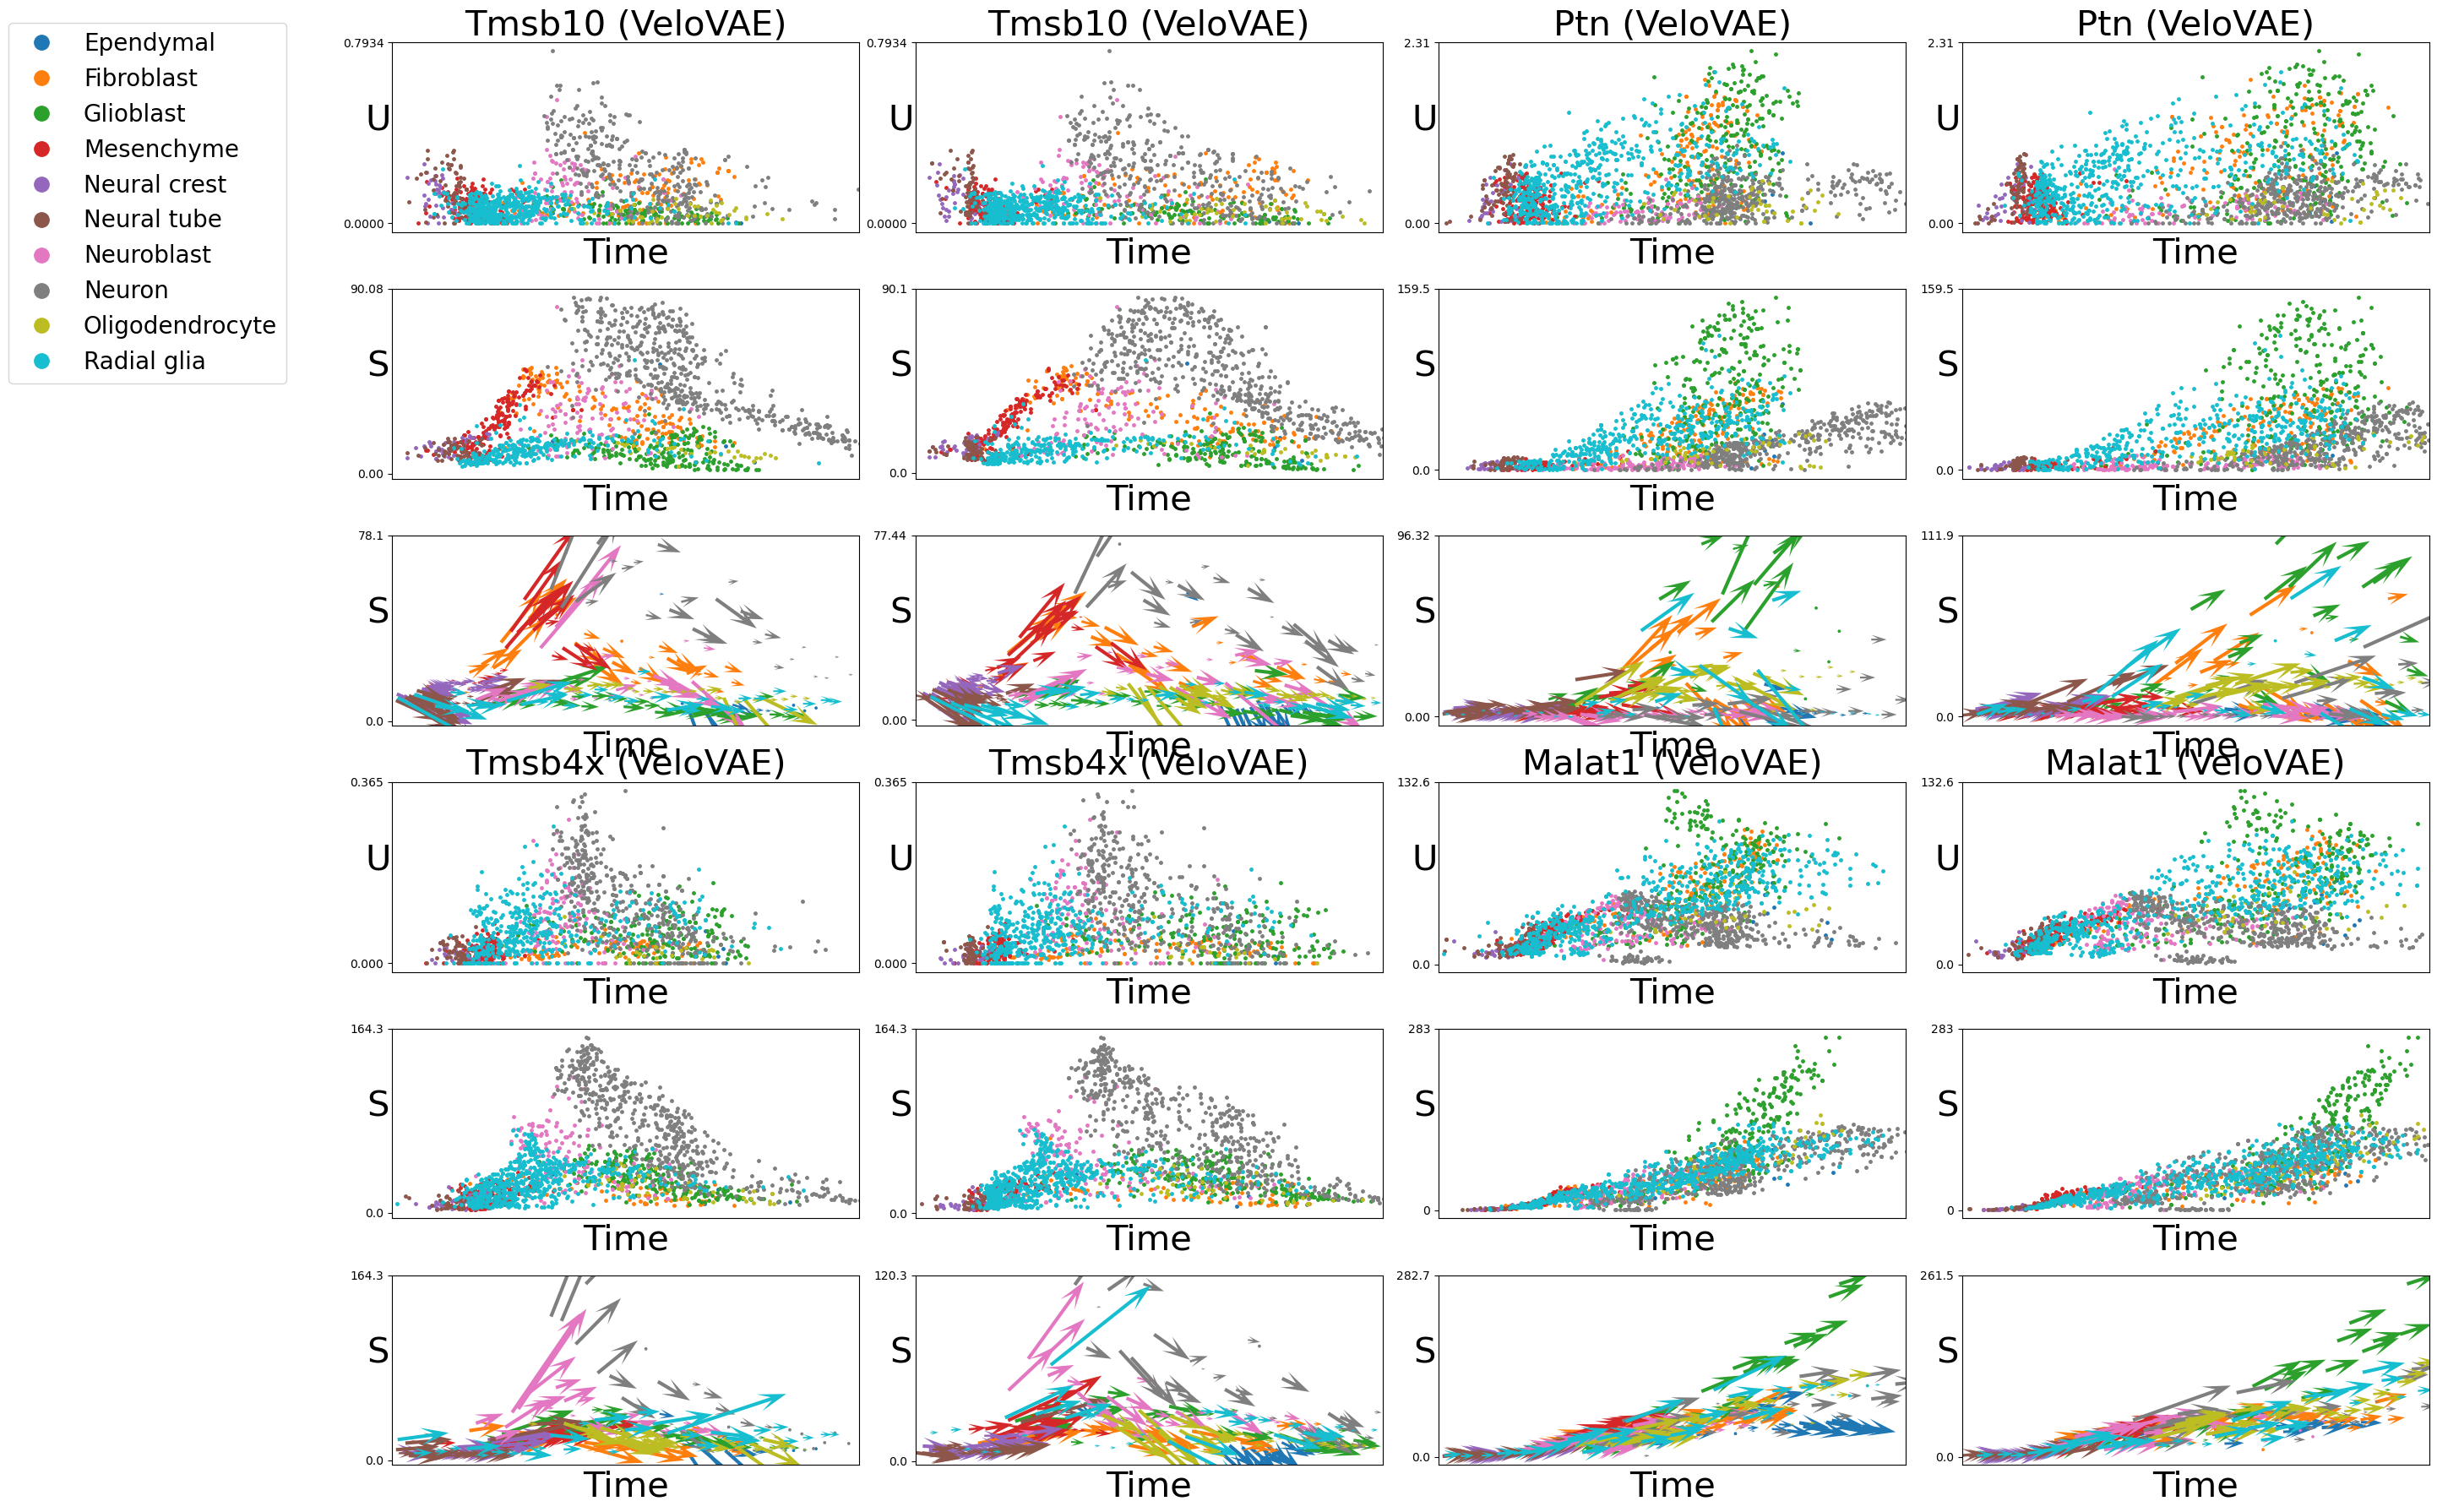

In [4]:
gene_plot = adata.var_names[gidx]
res, res_type = vv.post_analysis(adata,
                                 dataset,
                                 ['VeloVAE', 'FullVB'],
                                 ['velovae', 'fullvb'],
                                 compute_metrics=False,
                                 genes=gene_plot,
                                 plot_type=['time', 'gene'],
                                 grid_size=(2,2))

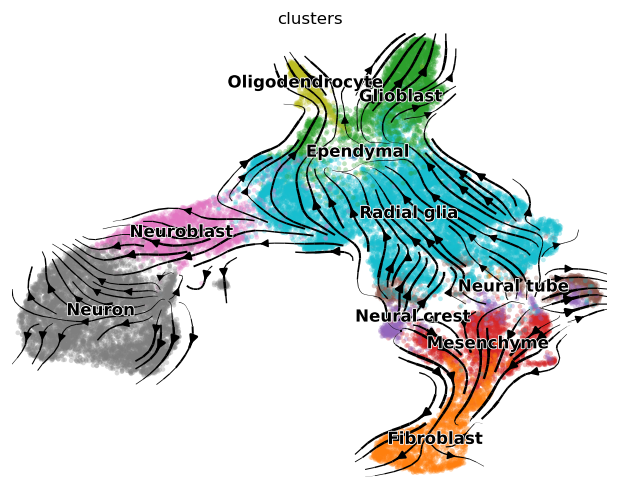

In [5]:
import scvelo as scv
scv.pl.velocity_embedding_stream(adata, vkey='fullvb_velocity', dpi=120)